In [29]:
import sys
sys.path.append('/home/tpopova/prj/PB_SCF/07_sphere_anneal/py_files')

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

from math import pi
from create_in import create_in
from free_energy import free_energy

In [30]:
r_sphere = 10
N = 150
chi_surf = 0
chi = 0.5
alpha = 0.5
Cs_values = 0.001
S = 5
N_layers = N

pK_brushes = 4.5
pH_b = np.linspace(3, 4.8, num = 5)

In [31]:
file_name_pro_list = []

for phb in pH_b:
    file_name_pro = create_in(
        template_shpere = '/home/tpopova/prj/PB_SCF/07_sphere_anneal/scf_templates/sphere.in',
        
        #название параметра
        range_param = 'none',
        min_val = 0.1,
        max_val = 0.1,
        
        r_sphere = r_sphere,
        Cs = Cs_values,
        chi = chi,
        chi_surf = chi_surf,
        
        N_layers = N_layers,
        N = N,
        
        pK_brush = pK_brushes,
        pH_b_scf = phb,
        
        S = S,
        alpha = alpha)
    
    file_name_pro_list.append(file_name_pro)

Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
8 iterations to find alphabulk values. 
NEWTON has been notified.
Your guess:it =  0  E = 1.483899e+00 |g| = 2.948708e+00 alpha = 1.000000e+00 
hessian scaling: 0.286811
it =  1  E = 1.388776e+00 |g| = 2.841059e+00 alpha = 1.339132e-01 
it =  2  E = 3.416445e+00 |g| = 2.853260e+00 alpha = 2.081464e-02 
it =  3  E = 3.319890e+00 |g| = 2.705719e+00 alpha = 1.939130e-02 
it =  4  E = 2.850785e+00 |g| = 2.679094e+00 alpha = 2.435762e-02 
it =  5  E = 3.009220e+00 |g| = 2.623275e+00 alpha = 2.008205e-02 
it =  6  E = 3.033625e+00 |g| = 2.531747e+00 alpha = 1.797266e-02 
it =  7  E = 2.585580e+00 |g| = 2.564869e+00 alpha = 2.382994e-02 
it =  8  E = 3.584548e+00 |g| = 2.454878e+00 alpha = 1.124010e-02 
it =  9  E = 2.485658e+00 |g| = 2.470762e+00 alpha = 2.236235e-02 
it =

In [32]:
pK_plus = 4
pK_minus = 5

f_ion_SCF_quen_values, potential = [], []

for (file_name_pro, phb) in zip(file_name_pro_list, pH_b):
    
    psi, phi_brush,r_range,  phi_end, f_ion_SCF_quen, Q_SCF_quen, pH_iep_in_quen, d_pH_b = free_energy(
        PK_MINUS=pK_minus,
        PK_PLUS=pK_plus,
        f_plus=0.5,
        pH_B=phb,
        file_names=file_name_pro
    )
    f_ion_SCF_quen_values.append(f_ion_SCF_quen)
    potential.append(psi)

<>:11: SyntaxWarning: invalid escape sequence '\D'
<>:24: SyntaxWarning: invalid escape sequence '\p'
<>:11: SyntaxWarning: invalid escape sequence '\D'
<>:24: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_675108/3428845385.py:11: SyntaxWarning: invalid escape sequence '\D'
  axs[0].set_ylabel('$\Delta F_{{ion}}(z)$', fontsize=16)
/tmp/ipykernel_675108/3428845385.py:24: SyntaxWarning: invalid escape sequence '\p'
  axs[1].set_ylabel('$\psi(z)$', fontsize=16)


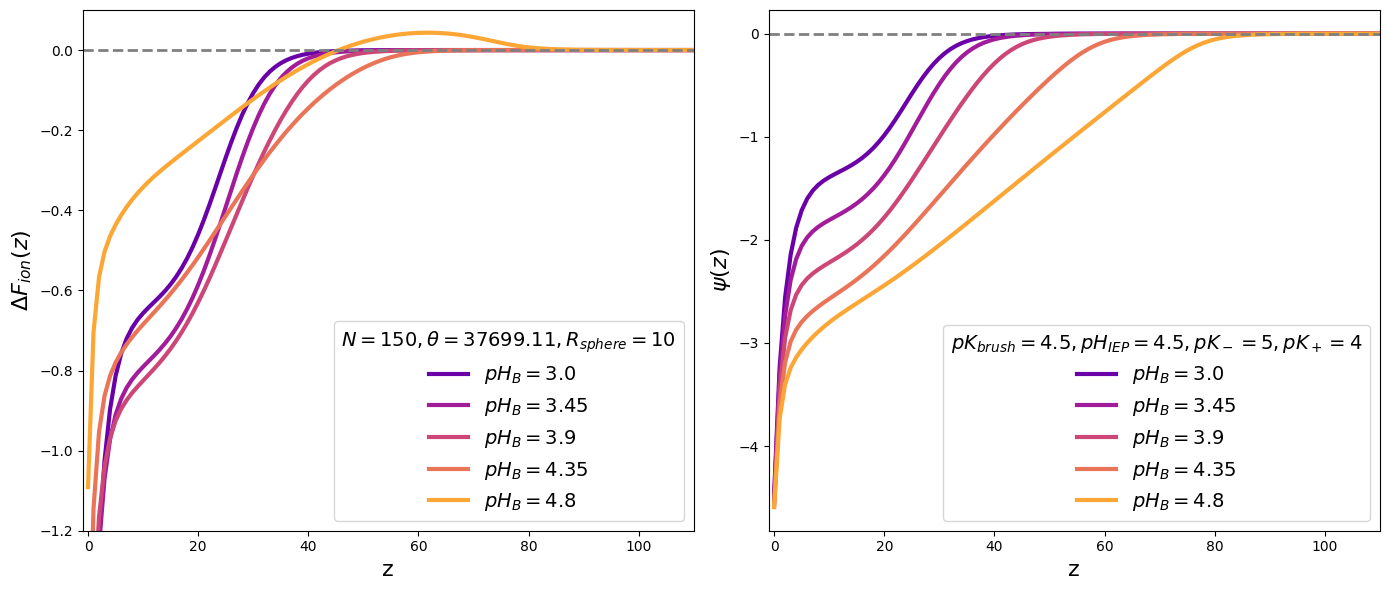

In [36]:
cmap = cm.plasma(np.linspace(0.2, 0.8, len(pH_b)))

# Создаем два подграфика (side by side)
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# График f_ion_SCF_quen
for i, phb in enumerate(pH_b):
    axs[0].plot(f_ion_SCF_quen_values[i], label=f'$pH_B = {round(phb, 4)}$', color=cmap[i], linewidth=3)
axs[0].axhline(y=0, color='gray', linestyle='--', linewidth=2)
axs[0].set_xlabel('z', fontsize=16)
axs[0].set_ylabel('$\Delta F_{{ion}}(z)$', fontsize=16)
axs[0].set_ylim(-1.2, 0.1)
axs[0].set_xlim(-1, 110)
axs[0].legend(title=f'$N = {N}, \\theta = {round(4 * np.pi * r_sphere**2 * N/S, 2)}, R_{{sphere}} = {r_sphere}$',
              loc='lower right',
              fontsize=14,
              title_fontsize = 14)

# График psi
for i, phb in enumerate(pH_b):
    axs[1].plot(potential[i], label=f'$pH_B = {round(phb, 4)}$', color=cmap[i], linewidth=3)
axs[1].axhline(y=0, color='gray', linestyle='--', linewidth=2)
axs[1].set_xlabel('z', fontsize=16)
axs[1].set_ylabel('$\psi(z)$', fontsize=16)
axs[1].set_xlim(-1, 110)
axs[1].legend(title=f'$pK_{{brush}} = {pK_brushes}, pH_{{IEP}} = {round(pH_iep_in_quen, 1)}, pK_- = {pK_minus}, pK_+ = {pK_plus}$',
              loc='lower right',
              fontsize=14,
              title_fontsize = 14)

# Показать графики
plt.tight_layout()
plt.savefig('sphere_anneal.pdf', dpi=300, bbox_inches='tight')
plt.show()